<a href="https://colab.research.google.com/github/Matus-Dubrava/ml_colab/blob/master/stacked_conv_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("ggplot")

In [0]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [0]:
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [0]:
stacked_encoder = keras.Sequential([
                                    keras.layers.Flatten(input_shape=[28, 28]),
                                    keras.layers.Dense(100, activation="selu"),
                                    keras.layers.Dense(30, activation="selu")
])
stacked_decoder = keras.Sequential([
                                    keras.layers.Dense(100, activation="selu", input_shape=[30]),
                                    keras.layers.Dense(28 * 28, activation="sigmoid"),
                                    keras.layers.Reshape([28, 28])
])
stacked_autoencoder = keras.Sequential([stacked_encoder, stacked_decoder])
stacked_autoencoder.compile(loss="binary_crossentropy", 
                            optimizer=keras.optimizers.SGD(learning_rate=1.5))

In [0]:
stacked_autoencoder.fit(X_train, X_train, epochs=10, 
                        validation_data=(X_valid, X_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 8s 152us/sample - loss: 0.3375 - val_loss: 0.3132
Epoch 2/10
55000/55000 [==============================] - 8s 145us/sample - loss: 0.3060 - val_loss: 0.3045
Epoch 3/10
55000/55000 [==============================] - 8s 143us/sample - loss: 0.2997 - val_loss: 0.2992
Epoch 4/10
55000/55000 [==============================] - 8s 143us/sample - loss: 0.2956 - val_loss: 0.2949
Epoch 5/10
55000/55000 [==============================] - 8s 145us/sample - loss: 0.2931 - val_loss: 0.2951
Epoch 6/10
55000/55000 [==============================] - 9s 161us/sample - loss: 0.2913 - val_loss: 0.2914
Epoch 7/10
55000/55000 [==============================] - 8s 152us/sample - loss: 0.2898 - val_loss: 0.2918
Epoch 8/10
55000/55000 [==============================] - 8s 143us/sample - loss: 0.2887 - val_loss: 0.2905
Epoch 9/10
55000/55000 [==============================] - 8s 145us/sample - loss: 0.287

In [0]:
def plot_image(image):
  plt.imshow(image, cmap="binary")
  plt.show()

In [0]:
def plot_reconstructions(model, original):
  fig, ax = plt.subplots(figsize=(20, 5), nrows=2, ncols=10)
  reconstructions = model.predict(original)

  for i in range(10):
    ax[0][i].imshow(original[i], cmap="binary")
    ax[1][i].imshow(reconstructions[i], cmap="binary")

    ax[0][i].get_xaxis().set_visible(False)
    ax[0][i].get_yaxis().set_visible(False)
    ax[1][i].get_xaxis().set_visible(False)
    ax[1][i].get_yaxis().set_visible(False)
  plt.show()

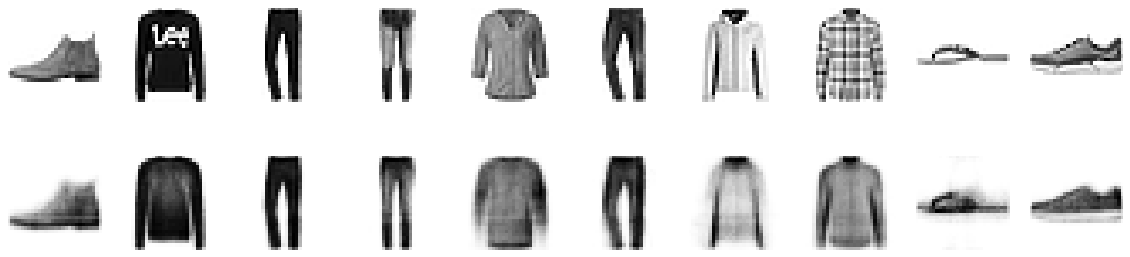

In [0]:
plot_reconstructions(stacked_autoencoder, X_test[:10])

Visualizing data using T-SNE

In [0]:
from sklearn.manifold import TSNE

X_valid_compressed = stacked_encoder.predict(X_valid)
tsne = TSNE()
x_valid_2D = tsne.fit_transform(X_valid_compressed)

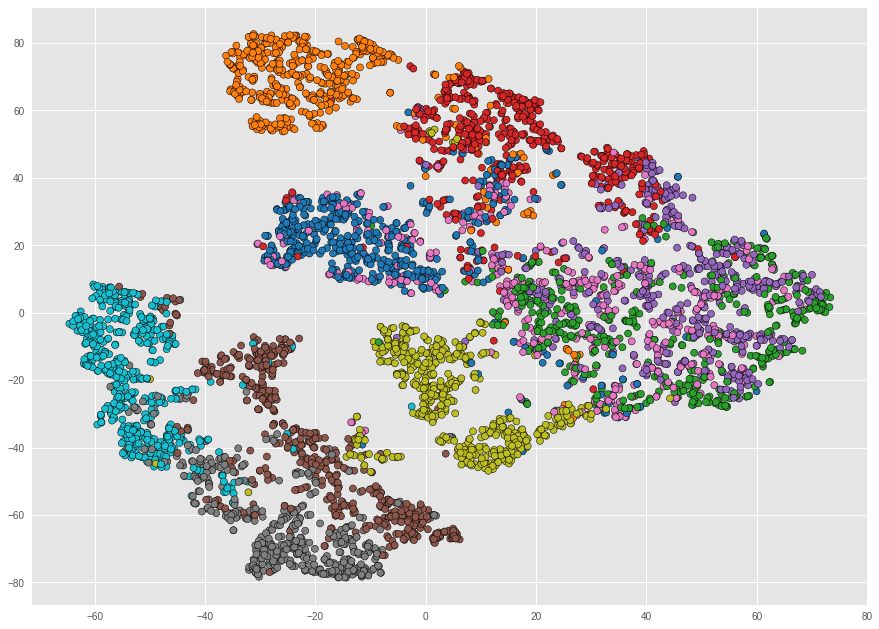

In [0]:
plt.figure(figsize=(15, 11))
plt.scatter(x_valid_2D[:, 0], x_valid_2D[:, 1], c=y_valid, cmap="tab10", edgecolor="k")
plt.show()

Convolutional autoencoder

In [0]:
conv_encoder = keras.Sequential([
                                 keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
                                 keras.layers.Conv2D(16, 3, padding="same", activation="selu"),
                                 keras.layers.MaxPool2D(pool_size=2),
                                 keras.layers.Conv2D(32, 3, padding="same", activation="selu"),
                                 keras.layers.MaxPool2D(pool_size=2),
                                 keras.layers.Conv2D(64, 3, padding="same", activation="selu"),
                                 keras.layers.MaxPool2D(pool_size=2)
])
conv_decoder = keras.Sequential([
                                 keras.layers.Conv2DTranspose(32, 3, strides=2, padding="valid", activation="selu", input_shape=[3, 3, 64]),
                                 keras.layers.Conv2DTranspose(16, 3, strides=2, padding="same", activation="selu"),
                                 keras.layers.Conv2DTranspose(1, 3, strides=2, padding="same", activation="sigmoid"),
                                 keras.layers.Reshape([28, 28])
])
conv_autoencoder = keras.Sequential([conv_encoder, conv_decoder])

In [0]:
conv_autoencoder.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0))

In [64]:
conv_autoencoder.fit(X_train, X_train, epochs=10,
                     validation_data=(X_valid, X_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 67s 1ms/sample - loss: 0.2650 - val_loss: 0.2655
Epoch 2/10
55000/55000 [==============================] - 67s 1ms/sample - loss: 0.2640 - val_loss: 0.2648
Epoch 3/10
55000/55000 [==============================] - 66s 1ms/sample - loss: 0.2632 - val_loss: 0.2638
Epoch 4/10
55000/55000 [==============================] - 66s 1ms/sample - loss: 0.2626 - val_loss: 0.2634
Epoch 5/10
55000/55000 [==============================] - 66s 1ms/sample - loss: 0.2620 - val_loss: 0.2649
Epoch 6/10
55000/55000 [==============================] - 67s 1ms/sample - loss: 0.2614 - val_loss: 0.2635
Epoch 7/10
55000/55000 [==============================] - 66s 1ms/sample - loss: 0.2610 - val_loss: 0.2621
Epoch 8/10
55000/55000 [==============================] - 66s 1ms/sample - loss: 0.2606 - val_loss: 0.2619
Epoch 9/10
55000/55000 [==============================] - 66s 1ms/sample - loss: 0.2602 - val_l

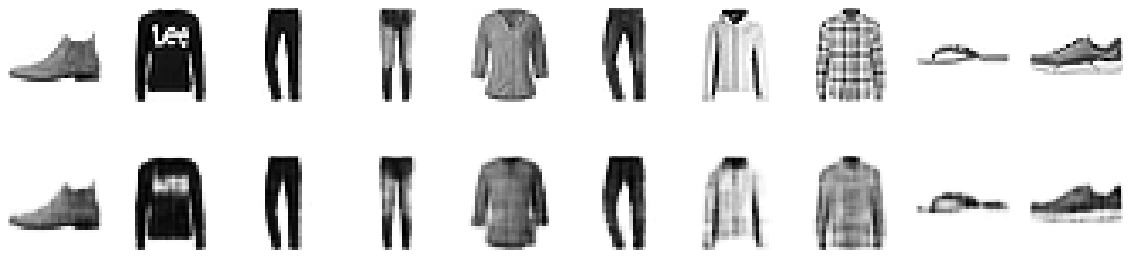

In [65]:
plot_reconstructions(conv_autoencoder, X_test[:10])